In davies, if you want to run pqonextract or lep files, there should be a couple of ligands, which means you have to run the davies part and pqi part tow times to get the pqi files of two ligands. then run the phreeqc in your laptop, upload the pqo files, to run the rest two models.

Very complex, it would be great if you use mac to directely run the code with ui interface in project final folder.

## The code to load the drive files.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# Import library

In [3]:
! pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import re
import math
import os
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import tkinter
import tkinter.messagebox
import matplotlib.pyplot as plt
import pandas as pd
from fuzzywuzzy import process

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Set the mental and ligand, which offerd by user in UI for py files. The UI can't excute in notebook

Change this part of code to change the mental and ligand you want to study, exp: "Fe". "Edta", Have to be same as the format in database. The code only can be doing davies under minteq.v4 databse now

ligands: 
Benzoate,Phenylacetate,Isophthalate,Diethylamine,Butylamine,Methylamine,Dimethylamine,Hexylamine,Ethylenediamine,Propylamine,Isopropylamine,Trimethylamine,Citrate,Nta,Edta,Propionate,Butyrate,Isobutyrate,Two_picoline,Three_picoline,Four_picoline,Formate,Isovalerate,Valerate,Acetate

metal:
Zn, Fe, Ni, Co, Mo 

In [ ]:
mental = "Zn"
ligand ="Citrate"

# Davies function

## 1. Get all database files inside database folder

In [11]:
dirlast = "/content/gdrive/MyDrive/IRP"

def readDir(dirPath):
    allFiles = []
    if os.path.isdir(dirPath):
        fileList = os.listdir(dirPath)
        for f in fileList:
            if(f!="extraction" and f!=".DS_Store"):    
             f = dirPath+'/'+f
             allFiles.append(f)
    return allFiles 

# 2. Davies opreation detailed explanation

Put the reaction and logk here

In [ ]:
r = "Zn+2 + Citrate-3 + H+ = ZnH(Citrate)"
log_k = 6.1

Define the list need to be used.

In [ ]:
# Zn+2 is +, actually doesnt matter at last cal.
symbol = []
# Zn+2 is 2 , Zn+3 is 3
num = []
# 0 is on the left, 1 is on the right
position = []
# Zn+2 is 1 , 2Zn+3 is 2
amount = []
# Constant value.
logb = [] 

Find the position of space and = for further locations.

In [ ]:
#Find all index of space
elements = [each.start() for each in re.finditer(" ", r)]  
#The elements number in this equations
number = int((len(elements)-2)/2+2)
#Find the position of = 
equal = r.find("=")

Do operation to the first element, to get the number which caculate need.

In [ ]:
# Judge the first character if or not a digit
if r[0].isdigit():
    amount.append(float(r[0]))
else:
    amount.append(1.00)
# Judge the last character of first elements, which is 2 in this exp, if or not a digit
if r[elements[0]-1:elements[0]].isdigit():
  num.append(float(r[elements[0]-1:elements[0]]))
# To find the +,- of the elements, do loop to check each character in Zn+2 if 
#  or not a letter in this exp.
  for i in range(0,elements[0]-1):   
   if not r[i].isalnum():
    if r[i] != " ":
      symbol.append(r[i])
 # if the last character of first elements, is +, - ,the num is 1.
elif r[elements[0]-1:elements[0]]=="+" or r[elements[0]-1:elements[0]]=="-" :
    symbol.append("NA")
    num.append(1.00)
# else the num is 0
else:
    num.append(0.00)
    symbol.append(r[elements[0]-1:elements[0]])
position.append(0)

Do opreation to the middle elements.

In [ ]:
for i in range(number):
   # Do operation to the  elements between first and last
   if i !=0 and i != number-1:
    #  locate the location of them, same as before
    if r[elements[i*2]-1:elements[i*2]].isdigit():
     num.append(float(r[elements[i*2]-1:elements[i*2]]))
     for j in range(elements[(i-1)*2+1],elements[i*2]-1):
         if not r[j].isalnum():
             if r[j] != " ":
              symbol.append(r[j])
    elif r[elements[i*2]-1:elements[i*2]]=="+" or r[elements[i*2]-1:elements[i*2]]=="-":
     symbol.append("NA")
     num.append(1.00)
    else:
         num.append(0.00)
         symbol.append(r[elements[i*2]-1:elements[i*2]])  
    # Juge it's position by compare with the " = "
    if elements[i*2]-1 < equal:
        position.append(0)
    else:
        position.append(1.00)

    if r[elements[i*2-1]+1:elements[i*2-1]+2].isdigit():
     
     amount.append(float(r[elements[i*2-1]+1:elements[i*2-1]+2]))
    else:
     amount.append(1.00)

Do opreation to the last element.

In [ ]:
# Do operation to the last one
if r[len(r)-1:len(r)].isdigit():
  num.append(float(r[len(r)-1:len(r)]))
  for i in range(elements[len(elements)-1],len(r)):   
   if not r[i].isalnum():
    if r[i] != " ":
      symbol.append(r[i])
elif r[len(r)-1:len(r)]=="+" or r[len(r)-1:len(r)]=="-":
         symbol.append("NA")
         num.append(1.00)
         
else:
        num.append(0.00)
        symbol.append(r[len(r)-1:len(r)])
position.append(1.00)  

if r[elements[len(elements)-1]+1].isdigit():
    amount.append(float(r[elements[len(elements)-1]+1]))
else:
    amount.append(1.00)

Do the caculations to the full ionic dataset, the davies euqation is as below:

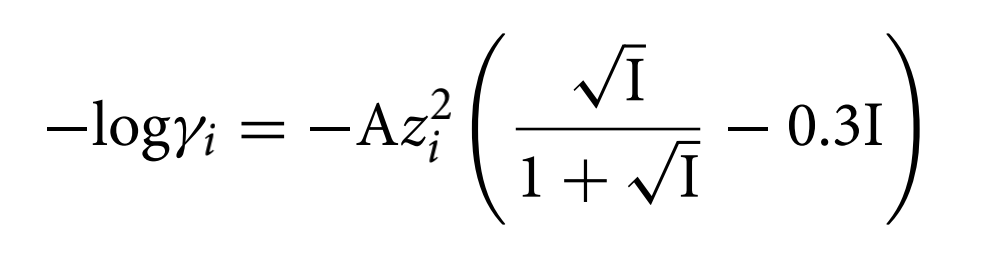



Where A is a dielectric constant of the solvent, z is the charge of the ion, and I is ion 
strength

ion represents the i in equation, A is 0.51 here, Z is the ion charges nums we extract from reaction.

In [ ]:
A = 0.51

In [ ]:
cals1 = 0.0
cals2 = 0.0
cals3 = 0.0

ionic = [0.05,0.15,0.3,0.5,1]
coe = []
# Do caculation to the full ionic dataset.
for ion in ionic:
  cal = []
  coefcient = 0.00
  for i in range(len(position)):
        # -Azi2
        cals1 = -A*num[i]*num[i]
        # sqrt(I)/(1+.sqrt(I))-0.3I ，inside the parentheses of the formula
        cals2 =math.sqrt(ion)/(1+math.sqrt(ion)) - 0.3 * ion
        # Times the number of elements
        cals3 = cals1*cals2*amount[i]
        # If elements locate at right,  this activity coefficient should  be reduced when caculate the total activity coefficient
        if position[i]==1:
            cals3 = -cals3
        cal.append(cals3)
  #Caculate the activity coefficient
  for c in cal:
    coefcient = coefcient +c
  coe.append(coefcient) 
#Caculate the logb
for co in coe:
    logB = co+log_k 
    logb.append(logB)
 

Output the caculate result.

In [ ]:
 for i in range(len(ionic)):
    print("ionic " + str(ionic[i])+"： " + str(coe[i])) 
    print("logb when ionic " + str(ionic[i])+"： " + str(logb[i]))

ionic 0.05： -1.1976921430893153
logb when ionic 0.05： 4.902307856910684
ionic 0.15： -1.67200601081423
logb when ionic 0.15： 4.42799398918577
ionic 0.3： -1.8841700865526942
logb when ionic 0.3： 4.215829913447306
ionic 0.5： -1.886484835343899
logb when ionic 0.5： 4.2135151646561
ionic 1： -1.4280000000000002
logb when ionic 1： 4.672


# 3. Davies function

The output tabel include reaction, stability constant is generate in davies folder. The validate tabel include activity conficient is in validate folder. The figure of the logb/ionic strength is in lepfig folder, you can change A and ionic in the follow:

In [ ]:
A = 0.51
ionic = [0.005,0.01,0.05,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [ ]:
def davies(mental,ligand):
    print("Begin davies operation:")
    print("/n")
    logk = []
    reaction = []
    datafrom = []
    ztotal = []
    vtotal = []
    file = dirlast+ '/data'+'/minteq.v4' '.txt' 
    f = open(file,'r')
    dataset = file[file.find("data")+5:50].strip(".txt")
    check = 0
    check2 = 0
    lines = f.readlines()
    master =dirlast+ '/davies'+'/'+ 'MASTER_SPECIES' + mental +ligand +'.txt'
    outputs = open(master, 'w')
    for i in range(len(lines)):
          if check ==0:
              if mental in lines[i]:
                   outputs.write(lines[i])
                   check = 2
          if check2 ==0:
              if ligand in lines[i]:
                   outputs.write(lines[i])
                   check2 = 3
          if mental in lines[i]:
             if ligand in lines[i]:
             # if "E" in lines[i]:
              if "log_k"in lines[i+1]:
               react = lines[i]
               reaction.append(react)
               k = lines[i+1][lines[i+1].find("k")+1:20].strip()
               logk.append(float(k))
               datafrom.append(dataset)
    if not reaction:
        return False
    outputs.close()
    k = 0 
    txt = dirlast+ '/davies'+'/'+mental+ligand+ '.txt'  
    output = open(txt, 'w') 
    tabel =dirlast+ '/davies'+'/'+ mental + ligand + '.csv' 
    validate = dirlast+ '/validate'+'/'+  mental + ligand + '.csv'
    names = []
    for r in reaction:
     z = []
     v = []
     r = r.strip()
     log_k = logk[k]
     output.write(r)
     output.write("\n")
     output.write("----------------------------------------------------")
     output.write("\n")
     output.write("logk: " + str(log_k))
     print(log_k)
     output.write("\n")
     output.write("Find from: "+datafrom[k])
     output.write("\n")
     output.write("\n")
     output.write("----------------------------------------------------")
     output.write("\n")
     symbol = []
     num = []
     k = k+1
    
     # 0 is on the left, 1 is on the right
     position = []
     amount = []
     logb = []              
     #Find all index of space
     elements = [each.start() for each in re.finditer(" ", r)]  
     
     number = int((len(elements)-2)/2+2)
     
     equal = r.find("=")
     name = r[equal+2:len(r)]
     names.append(name)
     
     
     # Do operation to the first elements eg. Zn+2 + 2Citrate-3 = Zn(Citrate)2-4
     # Judge the first character if or not a digit
     if r[0].isdigit():
        amount.append(float(r[0]))
     else:
        amount.append(1.00)
     # Judge the last character of first elements, which is 2 in this exp, if or not a digit
     if r[elements[0]-1:elements[0]].isdigit():
      num.append(float(r[elements[0]-1:elements[0]]))
      # To find the +,- of the elements, do loop to check each character in Zn+2 if 
     #  or not a letter in this exp.
      for i in range(0,elements[0]-1):   
       if not r[i].isalnum():
        if r[i] != " ":
          symbol.append(r[i])
     # if the last character of first elements, is +, - ,the num is 1.
     elif r[elements[0]-1:elements[0]]=="+" or r[elements[0]-1:elements[0]]=="-" :
        symbol.append("NA")
        num.append(1.00)
      # else the num is 0
     else:
        num.append(0.00)
        symbol.append(r[elements[0]-1:elements[0]])
    
     position.append(0)
     
     for i in range(number):
       # Do operation to the  elements between first and last
       if i !=0 and i != number-1:
        #  locate the location of them, same as before
        if r[elements[i*2]-1:elements[i*2]].isdigit():
         num.append(float(r[elements[i*2]-1:elements[i*2]]))
         for j in range(elements[(i-1)*2+1],elements[i*2]-1):
             if not r[j].isalnum():
                 if r[j] != " ":
                  symbol.append(r[j])
        elif r[elements[i*2]-1:elements[i*2]]=="+" or r[elements[i*2]-1:elements[i*2]]=="-":
         symbol.append("NA")
         num.append(1.00)
        else:
             num.append(0.00)
             symbol.append(r[elements[i*2]-1:elements[i*2]])  
        # Juge it's position by compare with the " = "
        if elements[i*2]-1 < equal:
            position.append(0)
        else:
            position.append(1.00)
    
        if r[elements[i*2-1]+1:elements[i*2-1]+2].isdigit():
         
         amount.append(float(r[elements[i*2-1]+1:elements[i*2-1]+2]))
        else:
         amount.append(1.00)
    # Do operation to the last one
     if r[len(r)-1:len(r)].isdigit():
      num.append(float(r[len(r)-1:len(r)]))
      for i in range(elements[len(elements)-1],len(r)):   
       if not r[i].isalnum():
        if r[i] != " ":
          symbol.append(r[i])
     elif r[len(r)-1:len(r)]=="+" or r[len(r)-1:len(r)]=="-":
         symbol.append("NA")
         num.append(1.00)
         
     else:
        num.append(0.00)
        symbol.append(r[len(r)-1:len(r)])
     position.append(1.00) 
    
     if r[elements[len(elements)-1]+1].isdigit():
        amount.append(float(r[elements[len(elements)-1]+1]))
     else:
        amount.append(1.00)
              
     cals1 = 0.0
     cals2 = 0.0
     cals3 = 0.0
     print(r)
     print(num)
     print(amount)
     print(r[len(r)-1:len(r)])
     
     coe = []
    # Do caculation to the full ionic dataset.
     for ion in ionic:
      cal = []
      coefcient = 0.00
      for i in range(len(position)):
            cals1 = -A*num[i]*num[i]
            cals2 =math.sqrt(ion)/(1+math.sqrt(ion)) - 0.3 * ion
            cals3 = cals1*cals2*amount[i]
            if position[i]==1:
                cals3 = -cals3
            cal.append(cals3)
      for c in cal:
        coefcient = coefcient +c
      coe.append(coefcient) 
      
    
     for co in coe:
        logB = co+log_k 
        logb.append(round(logB,3))
     plot = logb
     io = [0.005,0.01,0.05,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
     plt.plot(io, plot, ls="-",color="r",marker =",", lw=2, label=r)
     plt.xlabel('Ionic Strength')
     plt.ylabel('LogB')
     plt.legend()
     plt.savefig(dirlast+ '/daviesfig/'+name.strip()+'.jpg',bbox_inches='tight')
     plt.show()
     for i in range(len(ionic)):
         z.append(logb[i])
     for i in range(len(ionic)):
         v.append(-coe[i])
     ztotal.append(z)
     vtotal.append(v)
     for i in range(len(ionic)):
        print("ionic " + str(ionic[i])+"： " + str(coe[i])) 
        print("logb when ionic " + str(ionic[i])+"： " + str(logb[i]))
        output.write("ionic " + str(ionic[i])+"： " + str(logb[i]))
        output.write("\n")
        
     output.write("----------------------------------------------------")    
     output.write("\n")
    
    
    output.close()
    data = {"Reaction":reaction,"logk":logk}
    for i in range(len(ionic)):
     data[str(ionic[i])] = [t[i] for t in ztotal]
    dataframe=DataFrame(data)
    dataframe.to_csv(tabel,index=False,sep=',')
   
    
    
    datas = {"species":names,"logk":logk}
    for i in range(len(ionic)):
     datas[str(ionic[i])] = [t[i] for t in vtotal]
    dataframe=DataFrame(datas)
    dataframe.to_csv(validate,index=False,sep=',')
    fileList = os.listdir(dirlast+ '/davies')
    for fl in fileList:
     if os.path.getsize(dirlast+ '/davies/'+fl) == 0:
                os.remove(dirlast+ '/davies/'+fl)
                return False
    return True

In [ ]:
davies(mental ,ligand)

## 3. Plot several lines of reactions inside one figure.`

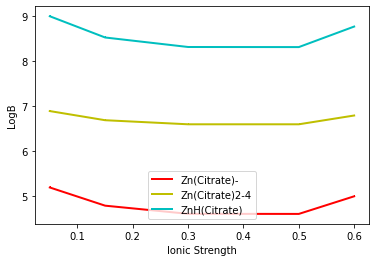

In [ ]:
tabel =dirlast+ '/davies'+'/'+mental+ligand+ '.csv' 
df = pd.read_csv(tabel)
name = []
ionic = [0.05,0.15,0.3,0.5,0.6]
logb= []
for i in range(0,3):
    r = df.iloc[i,0]
    equal = r.find("=")
    names = r[equal+2:len(r)].strip("\n")
    name.append(names)
    logbs = []
    for j in range(2,7):
       logbs.append(df.iloc[i,j])
    logb.append(logbs)
colors = ['r','y','c','g','b','k','r','y','c','g','b','k']
a = ""
for i in range(len(logb)):
 plt.plot(ionic,logb[i] , ls="-",color=colors[i],marker =",", lw=2, label=name[i])
 a = name[i]+"_"+ a
plt.xlabel('Ionic Strength')
plt.ylabel('LogB')
plt.legend()
plt.savefig(dirlast+ '/daviesfig/'+a+'.jpg',bbox_inches='tight')
plt.show()

# Generate the pqi

Set the ionic strength list here.

In [ ]:
ionic = [0.05,0.15,0.3,0.5,0.6]

Generete the pqi files, pqi file is in pqi folder.

In [ ]:
tabel =dirlast+ '/davies'+'/'+mental+ligand+ '.csv'
template = dirlast+ '/template'+'/example'+ '.pqi'
df = pd.read_csv(tabel)
name = []
logb= []
for i in range(len(df['Reaction'])):
    r = df.iloc[i,0].strip('\n')
    name.append(r)
    logbs = []
    for j in range(2,7):
       logbs.append(df.iloc[i,j])
    logb.append(logbs)
print(logb)
print(name)
print(len(df['Reaction']))

for ion in range(len(ionic)):
 
 pqi =dirlast+ '/pqi'+'/'+ str(ionic[ion])+ '.pqi' 
 f = open(template,'r')
 lines = f.readlines()
 outputs = open(pqi, 'w')
 write = True
 for i in range(len(lines)):
       if 'SOLUTION_MASTER_SPECIES' in lines[i]:
           outputs.write("SOLUTION_MASTER_SPECIES")
           outputs.write("\n")
           write = False 
           master =dirlast+ '/davies'+'/'+ 'MASTER_SPECIES' + '.txt'
           f = open(master,'r')
           liness = f.readlines()
           for l in liness:
            outputs.write(l)
           outputs.write("END")
           outputs.write("\n")
           outputs.write("   ")
           outputs.write("\n")
           outputs.write("SOLUTION_SPECIES")
           outputs.write("\n")
           for m in range(len(name)):
               outputs.write(name[m])
               outputs.write("\n")
               outputs.write("log_k		"+str(logb[m][ion]))
               outputs.write("\n")
           outputs.write("END")
           outputs.write("\n")
           outputs.write("   ")
           outputs.write("\n")
       if 'SOLUTION ' in lines[i]:
           write = True
       if 'Zns' in lines[i]:
           write = False
           new = lines[i].replace('Zns',mental)
           outputs.write(new)
           new2 = lines[i+1].replace('Citrates',ligand)
           outputs.write(new2)
           outputs.write("END")
           outputs.write("\n")
           outputs.write("\n")
       if 'Cl' in lines[i]:
           write = False
           new = lines[i].replace('0.1',str(ionic[ion]))
           outputs.write(new)
       if 'Na' in lines[i]:
           write = False
           new = lines[i].replace('0.1',str(ionic[ion]))
           outputs.write(new)

          
          
       if write == True:
        outputs.write(lines[i])
 outputs.close() 

[[5.183, 4.777, 4.595, 4.593, 4.986], [6.887, 6.683, 6.592, 6.592, 6.788], [9.002, 8.528, 8.316, 8.314, 8.772], [11.642, 11.168, 10.956, 10.954, 11.412]]
['Zn+2 + Citrate-3 = Zn(Citrate)-', 'Zn+2 + 2Citrate-3 = Zn(Citrate)2-4', 'Zn+2 + Citrate-3 + H+ = ZnH(Citrate)', 'Zn+2 + Citrate-3 + 2H+ = ZnH2(Citrate)+']
4


# Extract from the pqo( If you want to use it, make sure you have upload the pqo files you want to extract in pqo folder.)

A function to Find the concentration from the target lines include the complexes.

In [5]:
def find(s,ligand1):
    '''Find the concentration from the target lines include the complexes.
    
    The s-line and ligand comes from pqoextract function.'''
    starts = 0
    ends = 0
    c = False
    b = False
    for m in range(s.find(ligand1),len(s)):
                  if s[m] == " ": 
                      c = True
                  if s[m] != " " and c ==True:
                      starts = m
                      b = True
                      c = False
            
                  if s[m]==" " and b ==True:
                      ends = m
                      break
    return starts,ends 

Function to extract concentrations from the pqo to generate the csv contains the concentration

set the full ph list here

In [6]:
ph = [3,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0,5.2,5.4,5.6,5.8,6.0,6.2,6.4,6.6,6.8,7.0,7.2,7.4,7.6,7.8,8.0,
          8.2,8.4,8.6,8.8,9.0,9.2,9.4,9.6,9.8,10.0]
    

Set the full ionic strength list here

In [7]:
ionic = [0.005,0.01,0.05,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [8]:
def pqoextract(mental,ligand1,ligand2,ph1,ph2,ph3,ion1,ion2,ion3):
    '''Extract the concentration from the pqo files and output three csv files.
    
    The metal ligand and ph ionc strength comes from user input'''
    print("Begin pqoextract operation:")
    print("/n")
    
    p = ph.index(float(ph1))
    pp = ph.index(float(ph2))
    ppp = ph.index(float(ph3))

    m = 2.000e-04
    total = []
    name = []
    ions= []
    total2 =[]
    name2 = []
    ions2 = []
    totalph = []
    phs = []
    fractionph = []
    for ion in range(len(ionic)):
     fraction = []
     fractionph = []
     path1 = dirlast + "/pqo/"+str(ionic[ion])+mental+ligand1+".pqi.pqi.out"
     path2 = dirlast+ "/pqo/"+str(ionic[ion])+mental+ligand2+".pqi.pqi.out"
     
     #Open the pqi files.
     f = open(path1,'r', encoding='gb18030',errors='ignore')
     
     lines = f.readlines()
     start = []
     end = []
     fraction = []
     fractionph = []
      # Find the part that include the information of the fractions in the pqo files. 
     for i in range(len(lines)):
        if "Distribution of species" in lines[i]:
            start.append(i)
        if "Saturation indices" in lines[i]:
            end.append(i)
     # Begin extract the concentrations,
     for i in range(len(start)):
        tph = 0
        for s in lines[start[i]:end[i]]:
            if mental in s and ligand1 in s:   
                starts,ends = find(s,ligand1)
                tph = tph+float(s[starts:ends].strip())
        tph = tph/2        
        fraction.append(round(tph/m,3)) 
         # Set the limitation for the output ph csv.
        if i == p or i == pp or i ==ppp:
           fractionph.append(round(tph/m,3)) 
     name.append(ligand1)
     total.append(fraction)
     ions.append(ionic[ion])
      # Set the limitation for the output ion csv.
     if ionic[ion]==float(ion1) or ionic[ion]==float(ion2) or ionic[ion] == float(ion3):
         name2.append(ligand1)
         total2.append(fraction)
         ions2.append(ionic[ion])
     f = open(path2,'r', encoding='gb18030',errors='ignore')
     # Save the dataset this search result from 
     lines = f.readlines()
     start = []
     end = []
     fraction = []
     
     for i in range(len(lines)):
        if "Distribution of species" in lines[i]:
            start.append(i)
        if "Saturation indices" in lines[i]:
            end.append(i)
    
     for i in range(len(start)):
        tph = 0
        for s in lines[start[i]:end[i]]:
            if mental in s and ligand2 in s:
                starts,ends = find(s,ligand2)
                tph = tph+float(s[starts:ends].strip())    
        tph = tph/2        
        fraction.append(round(tph/m,3))
        if i == p or i == pp or i ==ppp:
           
           fractionph.append(round(tph/m,3)) 
     f = []
     for i in range(3):
         f.append(fractionph[i])
         f.append(fractionph[i+3])
     totalph.append(f)
     name.append(ligand2)
     total.append(fraction)
     ions.append(ionic[ion])
     
     if ionic[ion]==float(ion1) or ionic[ion]==float(ion2) or ionic[ion] == float(ion3):
        
         name2.append(ligand2)
         total2.append(fraction)
         ions2.append(ionic[ion])
  
    
    phs = [ph1,ph1,ph2,ph2,ph3,ph3]
    totalphnew = []
    s = []
    w = []
    e = []
    ss = []
    ww =[]
    ee =[]

     # Set the format of the ph files.
    for i in range(len(totalph)):
        s.append(totalph[i][-2])
        ss.append(totalph[i][-1])
        w.append(totalph[i][-4])
        ww.append(totalph[i][-3])
        e.append(totalph[i][-6])
        ee.append(totalph[i][-5])
    totalphnew.append(e)
    totalphnew.append(ee)
    totalphnew.append(w)
    totalphnew.append(ww)
    totalphnew.append(s)
    totalphnew.append(ss)
    phtabel = dirlast+'/lepcsv/'+mental+"_"+ligand1+"_"+ligand2+"_"+"ph"+'.csv' 
    iontabel =   dirlast+'/lepcsv/'+mental+"_"+ligand1+"_"+ligand2+"_"+"ion"+'.csv'
    alltabel = dirlast+'/lepcsv/'+mental+"_"+ligand1+"_"+ligand2+"_""all"+'.csv' 
    data = {"ionic":ions,"name":name}
    for i in range(len(ph)):
           data[str(ph[i])] = [t[i] for t in total]
  
    dataframe=DataFrame(data)
  
    dataframe.to_csv(alltabel,index=False,sep=',')
    
    datas = {"ionic":ions2,"name":name2}
    for i in range(len(ph)):
            datas[str(ph[i])] = [t[i] for t in total2]
    
    dataframe=DataFrame(datas)
 
    dataframe.to_csv(phtabel,index=False,sep=',')
    
    datass = {"ph":phs,"name":name2}
    for i in range(len(ionic)):
            datass[str(ionic[i])] = [t[i] for t in totalphnew]
    
    dataframe=DataFrame(datass)

    dataframe.to_csv(iontabel,index=False,sep=',')

Call the pqoextract function, set the mental,ligand,ph,ionic here. Three ph and ionic is the fix value you want to compare the opposite changing trend.
Generate file will be in lepcsv folder.

ligands: 
Benzoate,Phenylacetate,Isophthalate,Diethylamine,Butylamine,Methylamine,Dimethylamine,Hexylamine,Ethylenediamine,Propylamine,Isopropylamine,Trimethylamine,Citrate,Nta,Edta,Propionate,Butyrate,Isobutyrate,Two_picoline,Three_picoline,Four_picoline,Formate,Isovalerate,Valerate,Acetate

metal:
Zn, Fe, Ni, Co, Mo 

In [13]:
mental = "Zn"
ligand1 = "Edta"
ligand2 = "Citrate"
ph1 = "4"
ph2 = "6"
ph3 = "8"
ion1 = "0.01"
ion2 = "0.2"
ion3 = "0.15"
pqoextract(mental,ligand1,ligand2,ph1,ph2,ph3,ion1,ion2,ion3)

Begin pqoextract operation:
/n


# Get the LEP and draw the LEP by ph excel files.

The lep figure will be output in lepfig folder. The txt file include the information of lep is in lepout folder

In [21]:
def lepph(mental,ligand1,ligand2):
    '''Draw the lep ph diagram by the csv files generate from the pqoextract function.
    
    The mental and two ligands comes from user input.'''
    print("Begin draw lep:")
    print("/n")
    tabel = dirlast+'/lepcsv/'+mental+"_"+ligand1+"_"+ligand2+"_"+"ph"+'.csv' 
    df = pd.read_csv(tabel)
    fraction = []
    name = []
    cur =[]
    w = []
    namee = ""

    namee = str(df.iloc[1,1]) + "_"+str(df.iloc[0,1])
     #Get the fractioon from the csv files.
    for i in range(6):
     cur = []

     name.append(str(df.iloc[i,0])+df.iloc[i,1])
   
     for j in range(2,38):
  
        cur.append(float(df.iloc[i,j]))
        
     fraction.append(cur)
    
    ph = [3,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0,5.2,5.4,5.6,5.8,6.0,6.2,6.4,6.6,6.8,7.0,7.2,7.4,7.6,7.8,8.0,
          8.2,8.4,8.6,8.8,9.0,9.2,9.4,9.6,9.8,10.0]
    colors = ['r','r','c','c','b','b','y','y']
    c = ['ro','ro','co','co','bo','bo','yo','yo']
    lss = ['--','-','--','-','--','-','--','-']
     #Begin to draw the lep picture.
    for i in range(len(fraction)):
       #Draw the two lines in the diagrams.
      plt.plot(ph,fraction[i] ,ls=lss[i],color=colors[i],marker =",", lw=1,label=name[i])
        
      cur = 0
      mins = 10000
      loc = -1
      #Begin to find the closest point within the csv data, as it should be a pair to find, we only do when i%2 == 1.
      if i%2 == 1:
          for j in range(len(fraction[0])):
               cur = abs(fraction[i-1][j]-fraction[i][j])
               if cur<mins and fraction[i-1][j]<0.9 and fraction[i-1][j]>0.02 and fraction[i][j]<0.9 and fraction[i][j]>0.02:
                   mins = cur
                   loc = j
           #Get the point to be infinitely close
          if loc !=-1 and loc !=0 and loc != len(fraction[0])-1:
           #Split the interval into 10000 small points.
           x3 = np.linspace(ph[loc], ph[loc+1], 10000)       
           y1_new = np.linspace(fraction[i-1][loc], fraction[i-1][loc+1], 10000) 
           y2_new = np.linspace(fraction[i][loc], fraction[i][loc+1], 10000) 
            #Get the two point that the two points close to the minal value we set
           idx = np.argwhere(np.isclose(y1_new, y2_new, atol=1e-04)).reshape(-1)
           if idx.any():
            #If we found the point we plot them.
            plt.plot(x3[idx], y2_new[idx], c[i])
        #If we dont found the point we do it for it's left big interval. It is because we have to smaller the big interval, which make the plot more precise.
           else:
            x3 = np.linspace(ph[loc-1], ph[loc], 10000)      
            y1_new = np.linspace(fraction[i-1][loc-1], fraction[i-1][loc], 10000) 
            y2_new = np.linspace(fraction[i][loc-1], fraction[i][loc], 10000) 
            idx = np.argwhere(np.isclose(y1_new, y2_new, atol=1e-04)).reshape(-1)
            plt.plot(x3[idx], y2_new[idx], c[i])
           if x3[idx] and y2_new[idx]:
            w.append([df.iloc[i,0],round(max(x3[idx]),3), round(max(y2_new[idx]),3)])
         
          
        
    plt.xlabel('ph')
    plt.ylabel('fraction of complexed Zinc')
    
    plt.legend()
    plt.show()
    plt.savefig(dirlast+ '/lepfig/'+namee+mental+"_"+'_ph.jpg',bbox_inches='tight')
    
    outputs = open(dirlast+ '/lepout/'+namee+'_ph.txt', 'w')
    for i in range(len(w)):
      outputs.write("ionic strength:"+str(w[i][0]))
      outputs.write("\n")
      outputs.write("ph:"+str(w[i][1]))
      outputs.write("\n")
      outputs.write("Fraction:"+str(w[i][2]))
      outputs.write("\n")
      outputs.write("---------------------------------")
      outputs.write("\n")
    outputs.close()
    print(w)
    if w:
        print("we find the lep")
        return True
    else:
        print("No lep founded ")
        return False

Begin draw lep:
/n


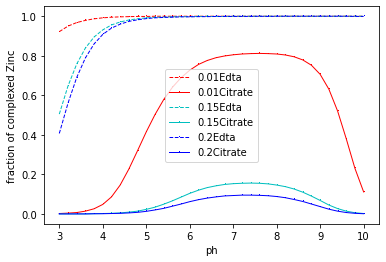

[]
No lep founded 


False

<Figure size 432x288 with 0 Axes>

In [22]:
lepph(mental,ligand1,ligand2)

# Get the LEP and draw the LEP by ionic excel files.

In [24]:
def lepion(mental,ligand1,ligand2):
    '''Draw the lep ion diagram by the csv files generate from the pqoextract function.
    
    The mental and two ligands comes from user input.'''
  
    tabel =dirlast+'/lepcsv/'+mental+"_"+ligand1+"_"+ligand2+"_""ion"+'.csv' 
    df = pd.read_csv(tabel)
    fraction = []
    name = []
    cur =[]
    w = []
    namee = ""
    namee = str(df.iloc[1,1]).strip("\xa0") + "_"+str(df.iloc[0,1]).strip("\xa0")
    #Get the fractioon from the csv files.
    for i in range(6):
     cur = []
     name.append(str(df.iloc[i,0])+df.iloc[i,1].strip("\xa0"))
     for j in range(2,15):
        cur.append(float(df.iloc[i,j]))
     fraction.append(cur)
    ionic = [0.005,0.01,0.05,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    colors = ['r','r','c','c','b','b','y','y']
    c = ['ro','ro','co','co','bo','bo','yo','yo']
    lss = ['--','-','--','-','--','-','--','-']
    a = ""
    print(fraction)
    #Begin to draw the lep picture.
    for i in range(len(fraction)):
      #Draw the two lines in the diagrams.
      plt.plot(ionic,fraction[i] ,ls=lss[i],color=colors[i],marker =",", lw=1,label=name[i])
       
      cur = 0
      mins = 10000
      loc = -1
      #Begin to find the closest point within the csv data, as it should be a pair to find, we only do when i%2 == 1.
      if i%2 == 1:
            for j in range(len(fraction[0])):
                 cur = abs(fraction[i-1][j]-fraction[i][j])
                 # Set the limitation as we have to find the exchange point. Not the point both two near smallest or biggest.
                 if cur<mins and fraction[i-1][j]<0.9 and fraction[i-1][j]>0.02 and fraction[i][j]<0.9 and fraction[i][j]>0.02:
                     mins = cur
                     loc = j
            #Get the point to be infinitely close
            if loc !=-1 and loc !=0 and loc != len(fraction[0])-1:
            #Split the interval into 10000 small points.
             x3 = np.linspace(ionic[loc], ionic[loc+1], 10000)       
             y1_new = np.linspace(fraction[i-1][loc], fraction[i-1][loc+1], 10000) 
             y2_new = np.linspace(fraction[i][loc], fraction[i][loc+1], 10000) 
              #Get the two point that the two points close to the minal value we set
             idx = np.argwhere(np.isclose(y1_new, y2_new, atol=0.0001)).reshape(-1)
              #If we found the point we plot them.
             if idx.any():
              plt.plot(x3[idx], y2_new[idx], c[i])
               #If we dont found the point we do it for it's left big interval. It is because we have to smaller the big interval, which make the plot more precise.
             else:
              x3 = np.linspace(ionic[loc-1], ionic[loc], 10000)       
              y1_new = np.linspace(fraction[i-1][loc-1], fraction[i-1][loc], 10000) 
              y2_new = np.linspace(fraction[i][loc-1], fraction[i][loc], 10000) 
              idx = np.argwhere(np.isclose(y1_new, y2_new, atol=0.0001)).reshape(-1)
              plt.plot(x3[idx], y2_new[idx], c[i])
             if x3[idx] and y2_new[idx]:
              w.append([df.iloc[i,0],round(max(x3[idx]),3), round(max(y2_new[idx]),3)])
           
          # plt.plot(ph[loc] , y  ,'ro')  
     
    plt.xlabel('ionic')
    plt.ylabel('fraction of complexed Zinc')
    plt.legend()
    plt.savefig(dirlast+ '/lepfig/'+mental+"_"+namee+'_ion.jpg',bbox_inches='tight')
    
    outputs = open(dirlast+ '/lepout/'+namee+'_ion.txt', 'w')
    
    for i in range(len(w)):
      outputs.write("ph:"+str(w[i][0]))
      outputs.write("\n")
      outputs.write("ion:"+str(w[i][1]))
      outputs.write("\n")
      outputs.write("Fraction:"+str(w[i][2]))
      outputs.write("\n")
      outputs.write("---------------------------------")
      outputs.write("\n")
    outputs.close()


[[0.994, 0.992, 0.976, 0.931, 0.908, 0.86, 0.813, 0.764, 0.714, 0.66, 0.601, 0.535, 0.464], [0.075, 0.048, 0.009, 0.002, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 0.998, 0.997, 0.995, 0.991, 0.986, 0.98, 0.973, 0.963, 0.951, 0.936], [0.79, 0.727, 0.396, 0.104, 0.062, 0.027, 0.015, 0.009, 0.006, 0.004, 0.003, 0.002, 0.001], [1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999, 0.998, 0.998, 0.996, 0.995, 0.994, 0.991], [0.86, 0.809, 0.494, 0.146, 0.088, 0.038, 0.019, 0.011, 0.007, 0.004, 0.003, 0.002, 0.001]]


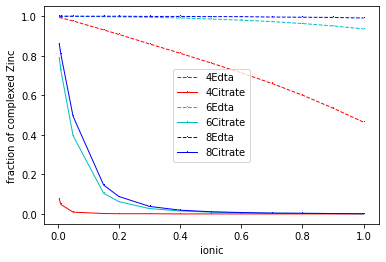

In [25]:
lepion(mental,ligand1,ligand2)

# Get the lep plot by dfob citrate experiment csv

[[0.052, 0.04, 0.025, 0.019, 0.014, 0.009, 0.007, 0.005, 0.004], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.914, 0.848, 0.644, 0.502, 0.342, 0.193, 0.129, 0.093, 0.071], [0.195, 0.175, 0.144, 0.13, 0.118, 0.111, 0.106, 0.104, 0.106], [0.965, 0.917, 0.727, 0.576, 0.393, 0.22, 0.146, 0.104, 0.08], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


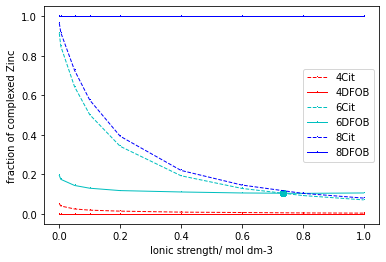

[[6, 0.736, 0.105]]


In [23]:
tabel =dirlast+'/lepcsv/ionic.csv' 
df = pd.read_csv(tabel)
fraction = []
name = []
cur =[]
w = []
namee = ""
namee = str(df.iloc[1,1]).strip("\xa0") + "_"+str(df.iloc[0,1]).strip("\xa0")

for i in range(6):
 cur = []
 name.append(str(df.iloc[i,0])+df.iloc[i,1].strip("\xa0"))
 for j in range(2,11):
    cur.append(float(df.iloc[i,j]))
 fraction.append(cur)
    
ionic = [ 0, 0.005 ,0.05 ,0.1 ,0.2 ,0.4,0.6 ,0.8,1]

colors = ['r','r','c','c','b','b','y','y']
c = ['ro','ro','co','co','bo','bo','yo','yo']
lss = ['--','-','--','-','--','-','--','-']
a = ""
print(fraction)
for i in range(len(fraction)):
 
  plt.plot(ionic,fraction[i] ,ls=lss[i],color=colors[i],marker =",", lw=1,label=name[i])
  # Get the common range, from `max(x1[0], x2[0])` to `min(x1[-1], x2[-1])`   
  cur = 0
  mins = 10000
  loc = -1
  
  if i%2 == 1:
        for j in range(len(fraction[0])):
             cur = abs(fraction[i-1][j]-fraction[i][j])
             if cur<mins and fraction[i-1][j]<0.9 and fraction[i-1][j]>0.02 and fraction[i][j]<0.9 and fraction[i][j]>0.02:
                 mins = cur
                 loc = j
        #Get the point to be infinitely close
        if loc !=-1:
         x3 = np.linspace(ionic[loc], ionic[loc+1], 10000)        
         y1_new = np.linspace(fraction[i-1][loc], fraction[i-1][loc+1], 10000) 
         y2_new = np.linspace(fraction[i][loc], fraction[i][loc+1], 10000)  
         idx = np.argwhere(np.isclose(y1_new, y2_new, atol=0.0001)).reshape(-1)
         if idx.any():
          plt.plot(x3[idx], y2_new[idx], c[i])
         else:
          x3 = np.linspace(ionic[loc-1], ionic[loc], 10000)       
          y1_new = np.linspace(fraction[i-1][loc-1], fraction[i-1][loc], 10000) 
          y2_new = np.linspace(fraction[i][loc-1], fraction[i][loc], 10000) 
          idx = np.argwhere(np.isclose(y1_new, y2_new, atol=0.0001)).reshape(-1)
          plt.plot(x3[idx], y2_new[idx], c[i])
         w.append([df.iloc[i,0],round(max(x3[idx]),3), round(max(y2_new[idx]),3)])  
 
plt.xlabel('Ionic strength/ mol dm-3')
plt.ylabel('fraction of complexed Zinc')

plt.legend()
plt.savefig(dirlast+ '/lepfig/'+namee+'_ion.jpg',bbox_inches='tight')
plt.show()

outputs = open(dirlast+ '/lepout/'+namee+'_ion.txt', 'w')

for i in range(len(w)):
  outputs.write("ph:"+str(w[i][0]))
  outputs.write("\n")
  outputs.write("ion:"+str(w[i][1]))
  outputs.write("\n")
  outputs.write("Fraction:"+str(w[i][2]))
  outputs.write("\n")
  outputs.write("---------------------------------")
  outputs.write("\n")
outputs.close()
print(w)

# The code to search from the database


The serach result tabel will generate in tabel folder

In [ ]:
# fix search Extract
def extract(text):
  # The path of the output files.
  tabel =dirlast+ '/tabel'+'/'+ text + '.csv'
  logk = []
  reaction = []
  datafrom = []
  #Read files 
  for file in readDir(dirlast+"/data"):
    f = open(file,'r')
    # Save the dataset this search result from 
    dataset = file[file.find("data")+5:50].strip(".txt")
    check = 0
    lines = f.readlines()
    linenumber = 0
    # Begin the search
    for i in range(len(lines)-2):
      # First ensure the search text is in this line, and then ensure it is a reaction by "="
      if text in lines[i] and  "=" in lines[i]:
          # There is two format of logk, neighboor and two lines behind the last one.
          if "log_k"in lines[i+1]:
           linenumber = i+1
          if "log_k"in lines[i+2]:
           linenumber = i+2
          # Extract logK according to the different situation
          if "log_k"in lines[i+1] or "log_k"in lines[i+2]:
          # Get the reaction
           react = lines[i].strip().strip('#').strip()
           reaction.append(react)
           # Get logk
           k = lines[linenumber][lines[linenumber].find("k")+1:50].strip()
           # only save the logk when k not euaql to  0
           if k != 0:
            logk.append(k)
            datafrom.append(dataset)
            # Write the output file.
            
            # Save the data into dataframe 
            data = {"Reaction":reaction,"logk":logk,"dataset":datafrom}
            dataframe=DataFrame(data)
            # Save the dataframe to the csv file.
            dataframe.to_csv(tabel,index=False,sep=',')
  return dataframe


def fuzzyextract(text,number = 100):
  # The path of the output files.
  tabel =dirlast+ '/tabel'+'/'+ text + '.csv'
  # List conclude all logk value.
  logk = []
  # List conclude all reaction text.
  reaction = []
  # List conclude all dataset the reaction from.
  datafrom = []
  logknew = []
  reactionnew = []
  datafromnew = []
  name = []
  namenew = []
  
  for file in readDir(dirlast+"/data"):
    f = open(file,'r')
    dataset = file[file.find("data")+5:50].strip(".txt")
    check = 0
    ks = 0.02
    lines = f.readlines()
    checkifexist = False
    linenumber = 0
    for i in range(len(lines)-2):
      checks = False
      # Save all the reactions
      if  "=" in lines[i]:
         # if "E" in lines[i]:
          if "log_k"in lines[i+1]:
           linenumber = i+1
           checks = True
          if "log_k"in lines[i+2]:
           linenumber = i+2
           checks = True
          ks = lines[linenumber][lines[linenumber].find("k")+1:50].strip()
          
          if "#" in ks:
               ks = ks[0: ks.find("#")-2]
          if checks==True:
           
           react = lines[i].strip().strip('#').strip()
           named = lines[i-1].strip()
           reaction.append(react)
           name.append(named)
           k = ks
           logk.append(k)
           datafrom.append(dataset)
  # Do fuzzy serach to the all reactions to match the search text.
  m = process.extract(text, reaction, limit=number)  
  # Save the serach result.
  for j in range(len(reaction)):
      for best in m:
          if best[0] in reaction[j]:
            if check== 0:
              reactionnew.append(best[0])
              datafromnew.append(datafrom[j])
              logknew.append(logk[j])
              namenew.append(name[j])
              check = check+1
            else:
                for o in range(len(reactionnew)):
                    if best[0] in reactionnew[o] and logk[j] in logknew[o]:
                        checkifexist = True
                if checkifexist == False:
                       reactionnew.append(best[0])
                       datafromnew.append(datafrom[j])
                       logknew.append(logk[j])
                       namenew.append(name[j]) 
                checkifexist = False
               
  data = {"Reaction":reactionnew,"logk":logknew,"dataset":datafromnew,"name":namenew}
           
  dataframe=DataFrame(data)
        
  dataframe.to_csv(tabel,index=False,sep=',')      
  fileList = os.listdir(dirlast+ '/tabel')
  for fl in fileList:
     if os.path.getsize(dirlast+ '/tabel/'+fl) == 0:
                os.remove(dirlast+ '/tabel/'+fl)
                return False
  return dataframe

Give the search text and the fuzzy searchtext, number

In [ ]:
search  ="FeCitrate"
fuzzy = "FeCitrate"
Number = 20

Run the seach code, the output file will in the tabel folder and the output folder

In [ ]:
print(fuzzyextract(fuzzy,number = 20))

                              Reaction   logk         dataset  \
0                              e- = e-    0.0  Tipping_Hurley   
1                              F- = F-    0.0  Tipping_Hurley   
2                              I- = I-    0.0  Tipping_Hurley   
3                              e- = e-  0.000             iso   
4                              F- = F-  0.000             iso   
5        Fe+2 + Citrate-3 = FeCitrate-    5.7          minteq   
6   Fe+2 + Citrate-3 + H+ = FeCitrateH    3.5          minteq   
7         Fe+3 + Citrate-3 = FeCitrate  12.55          minteq   
8  Fe+3 + Citrate-3 + H+ = FeCitrateH+   19.8          minteq   
9      Fe+2 + Citrate-3 = Fe(Citrate)-    6.1       minteq.v4   

                                 name  
0          #e- primary master species  
1          #F- primary master species  
2          #I- primary master species  
3                                      
4                                      
5                delta_h 0       kcal  
6   

In [ ]:
print(extract(search))

                              Reaction   logk dataset
0        Fe+2 + Citrate-3 = FeCitrate-    5.7  minteq
1   Fe+2 + Citrate-3 + H+ = FeCitrateH    3.5  minteq
2         Fe+3 + Citrate-3 = FeCitrate  12.55  minteq
3  Fe+3 + Citrate-3 + H+ = FeCitrateH+   19.8  minteq
